<a href="https://colab.research.google.com/github/Halskii/Machine-Learning/blob/main/CAP4611Assignment_2_James_Hall.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Uploading the datasets**

For this notebook to run you must first upload the training and testing CSV files into the google collab session.

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))


Saving test.csv to test (1).csv
Saving train.csv to train (1).csv
User uploaded file "test.csv" with length 48751 bytes
User uploaded file "train.csv" with length 50197 bytes


# **Importing the training and test datasets**

This section converts the uploaded CSV files into pandas dataframes via the read_csv function.

In [ ]:
import pandas as pd
import numpy as np
import io

train_data = pd.read_csv(io.BytesIO(uploaded['train.csv']))
train_data.head()
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 799 entries, 0 to 798
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    799 non-null    int64  
 1   fixed acidity         799 non-null    float64
 2   volatile acidity      799 non-null    float64
 3   citric acid           799 non-null    float64
 4   residual sugar        799 non-null    float64
 5   chlorides             799 non-null    float64
 6   free sulfur dioxide   799 non-null    float64
 7   total sulfur dioxide  799 non-null    float64
 8   density               799 non-null    float64
 9   pH                    799 non-null    float64
 10  sulphates             799 non-null    float64
 11  alcohol               799 non-null    float64
 12  quality               799 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 81.3 KB


In [ ]:
test_data = pd.read_csv(io.BytesIO(uploaded['test.csv']))
test_data.head()
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    800 non-null    int64  
 1   fixed acidity         800 non-null    float64
 2   volatile acidity      800 non-null    float64
 3   citric acid           800 non-null    float64
 4   residual sugar        800 non-null    float64
 5   chlorides             800 non-null    float64
 6   free sulfur dioxide   800 non-null    float64
 7   total sulfur dioxide  800 non-null    float64
 8   density               800 non-null    float64
 9   pH                    800 non-null    float64
 10  sulphates             800 non-null    float64
 11  alcohol               800 non-null    float64
dtypes: float64(11), int64(1)
memory usage: 75.1 KB


# **Analysis of our data**

Contained in this section are a series of visual tools for getting a feel for our data. Through our heatmap we can see the correlation of our datasets different features. From this we can surmise that while there are some features that should have a big impact on our quality of wine, there are obviously a few fields that make little to no difference.

Thankfully, we have a method built into our pipeline later in the program that will determine the most applicable features to use in the prediction of wine quality.

The plots that follow the heat map are to show the distribution of the individual features in the form of bad vs good wine (0 vs 1)

In [ ]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,799.0,399.000000,230.795725,0.00000,199.500000,399.00000,598.500,798.00000
fixed acidity,799.0,8.404255,1.820637,4.60000,7.100000,7.90000,9.300,15.60000
volatile acidity,799.0,0.532972,0.180163,0.16000,0.395000,0.52000,0.640,1.58000
citric acid,799.0,0.275207,0.199743,0.00000,0.090000,0.26000,0.440,1.00000
residual sugar,799.0,2.543930,1.380552,1.20000,1.900000,2.20000,2.600,15.50000
chlorides,799.0,0.087874,0.046212,0.01200,0.071000,0.08000,0.091,0.61000
free sulfur dioxide,799.0,15.732791,10.102371,1.00000,7.000000,14.00000,21.000,55.00000
total sulfur dioxide,799.0,46.568836,32.453258,6.00000,22.000000,37.00000,65.000,278.00000
density,799.0,0.996901,0.001891,0.99064,0.995725,0.99682,0.998,1.00369
pH,799.0,3.310300,0.158626,2.74000,3.210000,3.31000,3.400,4.01000


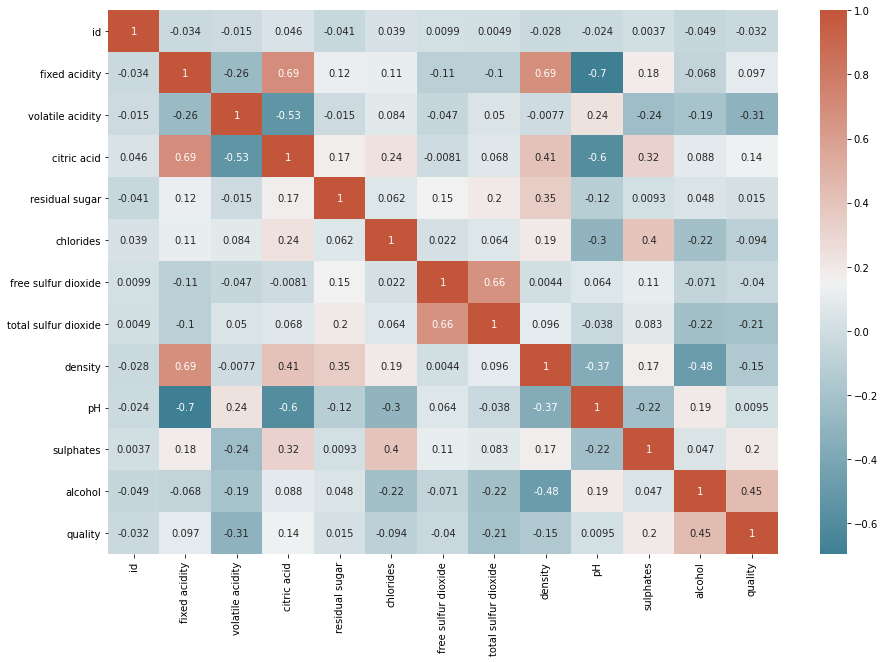

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

corr = train_data.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

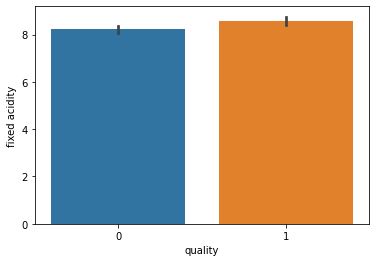

In [ ]:
fig = plt.figure(figsize = (6,4))
sns.barplot(x = 'quality', y = 'fixed acidity', data = train_data)

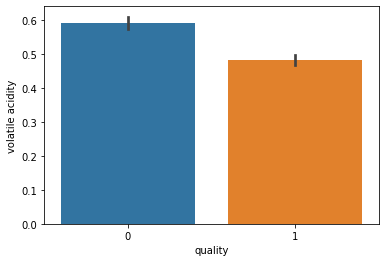

In [ ]:
fig = plt.figure(figsize = (6,4))
sns.barplot(x = 'quality', y = 'volatile acidity', data = train_data)

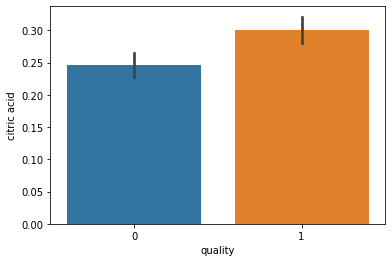

In [ ]:
fig = plt.figure(figsize = (6,4))
sns.barplot(x = 'quality', y = 'citric acid', data = train_data)

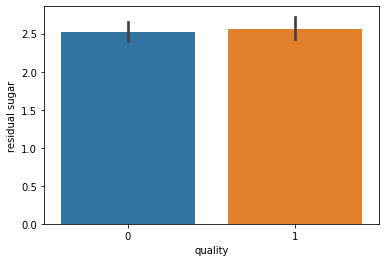

In [ ]:
fig = plt.figure(figsize = (6,4))
sns.barplot(x = 'quality', y = 'residual sugar', data = train_data)

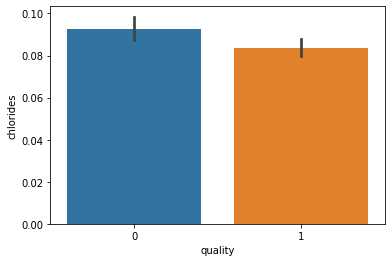

In [ ]:
fig = plt.figure(figsize = (6,4))
sns.barplot(x = 'quality', y = 'chlorides', data = train_data)

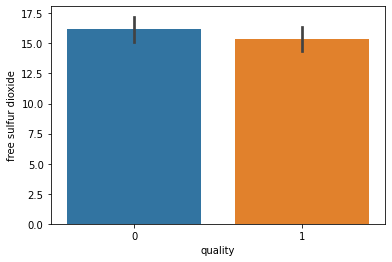

In [ ]:
fig = plt.figure(figsize = (6,4))
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = train_data)

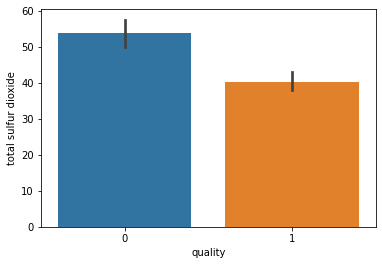

In [ ]:
fig = plt.figure(figsize = (6,4))
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = train_data)

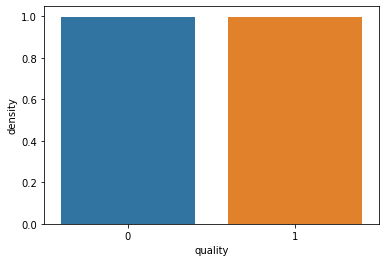

In [ ]:
fig = plt.figure(figsize = (6,4))
sns.barplot(x = 'quality', y = 'density', data = train_data)

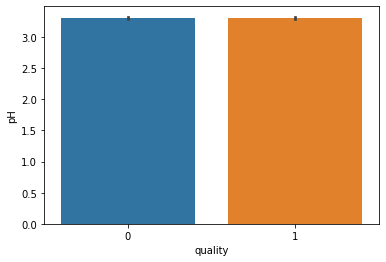

In [ ]:
fig = plt.figure(figsize = (6,4))
sns.barplot(x = 'quality', y = 'pH', data = train_data)

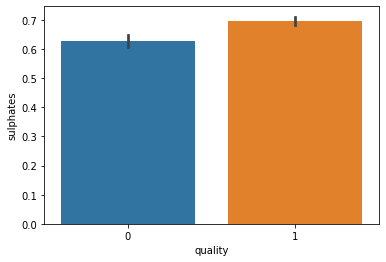

In [ ]:
fig = plt.figure(figsize = (6,4))
sns.barplot(x = 'quality', y = 'sulphates', data = train_data)

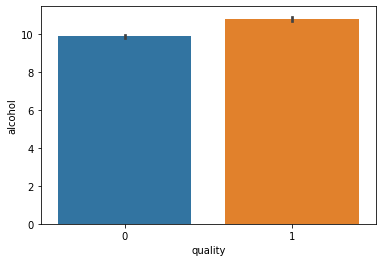

In [ ]:
fig = plt.figure(figsize = (6,4))
sns.barplot(x = 'quality', y = 'alcohol', data = train_data)

# **Checking for NaN values in the training data**

In this cell is a simple function to check whether NaN values exist in the data. Initially it had the capability of removing NaN values, but now it is included via Imputation in my pipeline that is implemented later in the program.

In [ ]:
if(np.all((nans == 0))) : print("No NaN values")
else                    : print("There are some NaN values...")

No NaN values


# **Outliers**

To get a grasp of how many outliers are in each feature, here we use interquartile ranges to determine which values are outliers using 25% as our lower bound, and 75% as our upper bound.


**Outliers will be dealt with via the QuantileTransformer() function later on within our pipeline.**

In [ ]:
higherQ = .75
lowerQ =.25

quantiles = train_data.iloc[:, :].quantile([lowerQ, higherQ]).transpose()

# Calculates thresholds for deeming values as outliers and stores them into a pandas dataframe.
outliers = pd.DataFrame({'Lower Threshold' : quantiles[lowerQ] - (1.5 * (quantiles[higherQ] - quantiles[lowerQ])),
                         'Upper Threshold' : quantiles[higherQ] + (1.5 * (quantiles[higherQ] - quantiles[lowerQ])),
                         'Outliers' : 0
                         })

# Calculates how many outliers are in each column.
for column in train_data.iloc[:, :].columns:
    lower_val = outliers.at[column, 'Lower Threshold']
    upper_val = outliers.at[column, 'Upper Threshold']

    outliers.at[column, 'Outliers'] = sum(train_data[column] < lower_val) + sum(train_data[column] > upper_val)

outliers

,Lower Threshold,Upper Threshold,Outliers
id,-399.000000,1197.000000,0
fixed acidity,3.800000,12.600000,24
volatile acidity,0.027500,1.007500,9
citric acid,-0.435000,0.965000,1
residual sugar,0.850000,3.650000,79
chlorides,0.041000,0.121000,57
free sulfur dioxide,-14.000000,42.000000,12
total sulfur dioxide,-42.500000,129.500000,21
density,0.992312,1.001413,15
pH,2.925000,3.685000,19



Below this are some boxplots of the values in each respective feature, it's another way of visualizing our data's distrbution.


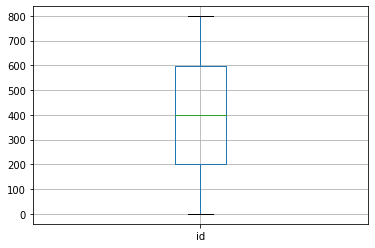

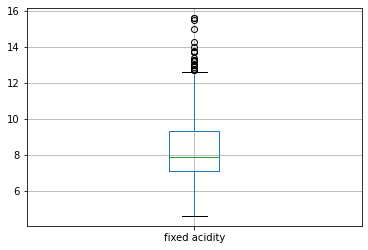

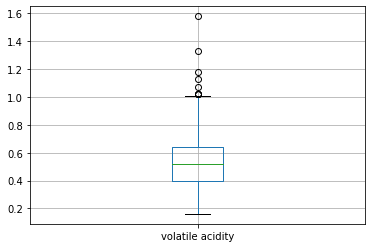

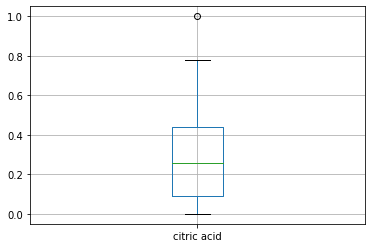

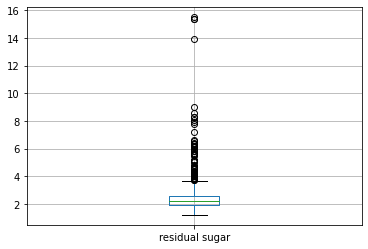

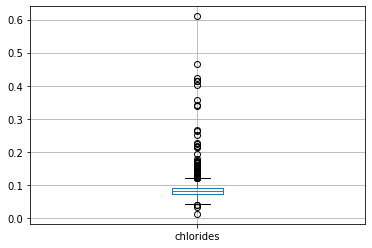

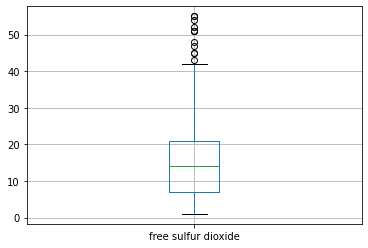

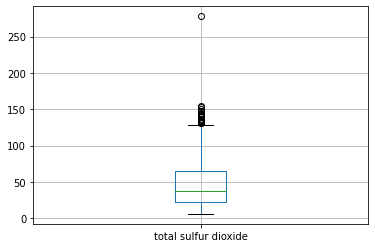

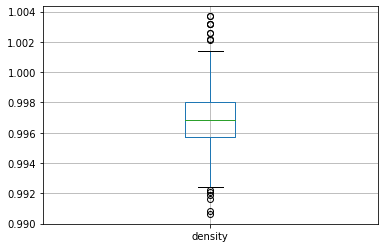

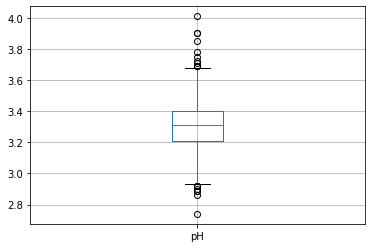

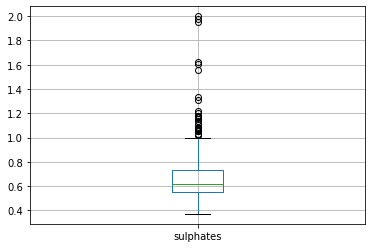

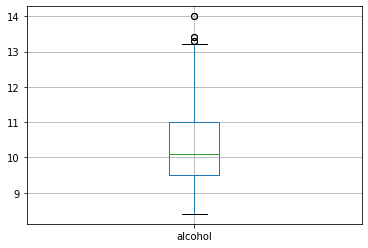

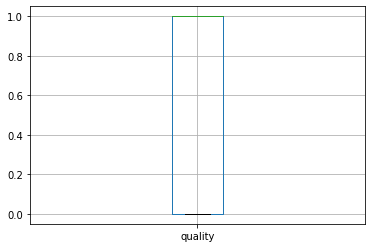

In [ ]:
for column in train_data:
    plt.figure()
    train_data.boxplot([column])

# **Splitting the dataset**

Here we drop any duplicates in the data, create our target label y, and our training data X, and split them using train_test_split.

I tested different values for test_size and .25 seems to be the most consistently well-performing value for the dataset.

In [ ]:
from sklearn.model_selection import train_test_split

train_data.drop_duplicates
y = train_data['quality']
X = train_data.drop(['id', 'quality'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=40, stratify=y)

# **Making the pipeline**

This section creates a KNeighborsClassifier object to put in a pipeline.

Our pipeline is created in this section implementing:


*   Standardization in the form of a scaler (StandardScaler). I picked standardization over normalization because it came out with the higher f1 score seemingly due to the level of variance in the dataset.

*   Outlier detection/removal in the form of a QuantileTransformer.


*   An Imputer to handle any potential missing values.
*   A feature selector, SelectKBest, to select the features most applicable for our prediction.

*   Our previously created KNeighborsClassifier object. 

**NOTE:** I have inserted the best parameters I found into my pipeline declaration to save time when grading. As such I'll comment out the related lines of code in the Hyperparameter section as well.


In [ ]:
from sklearn.preprocessing import StandardScaler, QuantileTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.impute import SimpleImputer

pipe = Pipeline(steps=[('standardizer', StandardScaler()),
                       ('quant', QuantileTransformer(n_quantiles=25)),
                       ('imp', SimpleImputer(strategy='mean')),
                       ('feature_select', SelectKBest(k=8)),
                       ('knn', KNeighborsClassifier(n_neighbors=15))])

# **Hyperparameter Tuning**

In this section I implemented hyperparameter tuning by using a GridSearch object to find the best parameters for my pipeline.

GridSearch tests the f1 score of our pipeline for the different combinations of parameters that are possible from the 'parameters' declarations below. 

**For example**: the 'feature_select__k' entry in parameters allows grid search to test values from k=1 to k=(the total number of features).

**NOTE:** This section takes a few minutes if you let it search. One way to speed up grading is to take the best values and put them in the pipeline functions above, which I have already done for the convenience of the grader. 

For reference these are the best known parameters:


*   quant: n_quantiles = 25
*   imp: strategy='mean'
*   feature_select: k = 8
*   knn : n_neighbors = 15


 






In [ ]:
from sklearn.model_selection import GridSearchCV, cross_val_score

# Creating parameter lists for our grid search.
parameters = {}
#parameters['quant__n_quantiles'] = range(5, 50, 5)
#parameters['imp__strategy'] = ['mean', 'median', 'most_frequent']
#parameters['knn__n_neighbors'] = range(1, 50, 2)
#parameters['feature_select__k']  = range(1, len(X_train.columns))

CV = GridSearchCV(pipe, parameters, scoring='f1', n_jobs=1)
CV.fit(X_train, y_train)

print('Best f1 Score: ', CV.best_score_)
#print('Best Parameters: ', CV.best_params_)    

Best f1 Score:  0.8020646146830825


The portion below is commented out because it takes way too long and has no application towards grading. I used it to create a distribution of F1 scores and took the median of that as an indicator of whether the model was good enough to submit predictions for.

In [ ]:
#from statistics import median

# Uses Cross Validation To Evaluate Model
#CV_Result = cross_val_score(CV, X_train, y_train, cv=20, n_jobs=-1, scoring='f1', verbose=1)
#print(); print(median(CV_Result))

# **Metrics**

This section below calculates and reports all the metrics relevant to our model.

It generates a classification report, along with an accuracy score, f1 score, and a roc score.

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

y_pred = CV.predict(X_train)
print(classification_report(y_train, y_pred))

# Computes all the accuracy / f1 / roc metrics.
accuracy = accuracy_score(y_train, y_pred.round())
f1 = f1_score(y_train, y_pred.round())
roc = roc_auc_score(y_train, y_pred)

# Prints out the metrics we computed above.
print("KNN Model Accuracy: " + str(accuracy))
print("KNN Model F1: " + str(f1))
print("KNN Model ROC: " + str(roc))

              precision    recall  f1-score   support

           0       0.77      0.77      0.77       279
           1       0.80      0.80      0.80       320

    accuracy                           0.79       599
   macro avg       0.79      0.79      0.79       599
weighted avg       0.79      0.79      0.79       599

KNN Model Accuracy: 0.7863105175292153
KNN Model F1: 0.8006230529595015
KNN Model ROC: 0.7850750448028675


# **Output**

Generates and saves our test data's predictions to a CSV file named 'my_submission.csv'

In [ ]:
X_test=test_data.drop('id', axis=1)
test_pred = CV.predict(X_test)

output = pd.DataFrame({'id': test_data.id, 'quality': test_pred.astype(int)})
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")
output

Your submission was successfully saved!


,id,quality
0,0,1
1,1,0
2,2,0
3,3,1
4,4,1
...,...,...
795,795,0
796,796,1
797,797,1
798,798,1
